<a href="https://colab.research.google.com/github/jksrc/pytorch-tutorial/blob/main/pytorch_nn_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=3744dcc80e2404fe31d768ee40941c44e0013223006a13bf650a3faa914eafb8
  Stored in directory: /root/.cache/pip/wheels/05/7d/1b/8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz


tensor(141.2665, dtype=torch.float64)
tensor(76.0888, dtype=torch.float64)
tensor(52.9120, dtype=torch.float64)
tensor(43.5628, dtype=torch.float64)
tensor(39.3986, dtype=torch.float64)
tensor(37.3565, dtype=torch.float64)
tensor(36.2277, dtype=torch.float64)
tensor(35.5029, dtype=torch.float64)
tensor(34.9603, dtype=torch.float64)
tensor(34.5015, dtype=torch.float64)
tensor(34.0826, dtype=torch.float64)
tensor(33.6838, dtype=torch.float64)
tensor(33.2963, dtype=torch.float64)
tensor(32.9161, dtype=torch.float64)
tensor(32.5413, dtype=torch.float64)
tensor(32.1711, dtype=torch.float64)
tensor(31.8051, dtype=torch.float64)
tensor(31.4431, dtype=torch.float64)
tensor(31.0850, dtype=torch.float64)
tensor(30.7307, dtype=torch.float64)
tensor(30.3802, dtype=torch.float64)
tensor(30.0334, dtype=torch.float64)
tensor(29.6902, dtype=torch.float64)
tensor(29.3507, dtype=torch.float64)
tensor(29.0148, dtype=torch.float64)
tensor(28.6825, dtype=torch.float64)
tensor(28.3537, dtype=torch.float64)


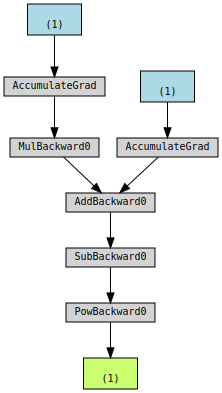

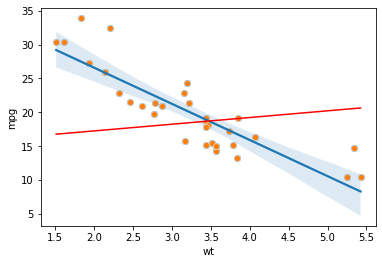

In [4]:
#%% packages
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

#%% data import
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

#%% visualise the model
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

#%% convert data to tensor
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values.tolist()
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y = torch.tensor(y_list)


#%% training
w = torch.rand(1, requires_grad=True, dtype=torch.float64)
b = torch.rand(1, requires_grad=True, dtype=torch.float64)

num_epochs = 100
learning_rate = 1e-3
for epoch in range(num_epochs):
  for i in range(len(X)):
    # x, y = torch.tensor(X_list[i]), torch.tensor(y_list[i])
    # forward pass
    y_predict = X[i] * w + b
    # calculate loss
    loss_tensor = torch.pow(y_predict - y[i], 2)
    # backward pass
    loss_tensor.backward()
    # extract losses
    loss_value = loss_tensor.data[0]
    # update weights and biases
    with torch.no_grad():
      w -= w.grad * learning_rate
      b -= b.grad * learning_rate
      w.grad.zero_()
      b.grad.zero_()
  print(loss_value)

#%% check results
print(f"Weight: {w.item()}, Bias: {b.item()}")
# %%
y_pred = (torch.tensor(X_list)*w+b).detach().numpy()
# %%
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')
# %% (Statistical) Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_np, y_list)
print(f"Slope: {reg.coef_}, Bias: {reg.intercept_}")


# %% create graph visualisation
# make sure GraphViz is installed (https://graphviz.org/download/)
# if not computer restarted, append directly to PATH variable
import os
from torchviz import make_dot
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'
make_dot(loss_tensor)
# %%